In [1]:
from os.path import split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import pipeline
from transformers import BertTokenizer, AutoModel

C:\Users\Radit\anaconda3\envs\sentiment-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [38]:
df = pd.read_csv("../data/Jatim-Park-1-1000.csv")

In [39]:
df.head(5)

,user,review,rating
0,Navis Otnaidu,"Kesini weekend di hari sabtu, mulai dari petug...",5
1,Wahyu Dwipayana,Tempat wisata yang super seru! 🎢 Di Jatim Park...,5
2,Taufik Yulianto,Untuk pertamakalinya saya masuk JatimPark 1 se...,5
3,mei Sholihah,Batu dan malang mmg t4 yg menarik utk berlibur...,5
4,Ukhtiana,"Seperti tempat liburan pada umumnya, bukanya j...",4


In [40]:
print(df.info())
print('========================')
print(df.describe())
print('========================')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    500 non-null    object
 1   review  500 non-null    object
 2   rating  500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ KB
None
           rating
count  500.000000
mean     4.610000
std      0.876034
min      1.000000
25%      5.000000
50%      5.000000
75%      5.000000
max      5.000000


In [41]:
print("Jumlah data kosong: ")
print(df.isnull().sum())
print('================================')
print("Jumlah data duplikat: ", df.duplicated().sum())

Jumlah data kosong: 
user      0
review    0
rating    0
dtype: int64
Jumlah data duplikat:  0


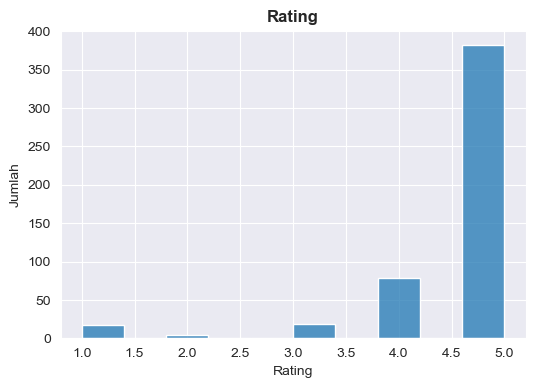

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.title('Rating', fontweight='bold')
plt.show()

In [ ]:
def preprocess_for_labeling(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # huruf berlebihan
    text = text.strip().lower()
    text = normalize_slang(text)  # <- fungsi opsional
    return text


In [43]:
def case_folding(text):
    return text.lower()     # Mengubah menjadi lowercase

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)      # Menghapus URL
    text = re.sub(r'@\w+|#\w+', '', text)       # Menghapus Mention dan juga Hastag
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)       # Menghapus semua karakter kecuali huruf dan angka
    text = re.sub(r'\s+', ' ', text)        # Menghapus spasi ganda
    text = re.sub(r'(.)\1{2,}', r'\1', text)        # Menghapus kata  yang berlebihan
    text = text.strip()
    return text

# def clean_text(text):
#     text = str(text)
#     text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)     # Menghapus url, mention, hashtag
#     text = emoji.demojize(text, delimiters=(" ", " "))       # convert emoji to words
#     text = re.sub(r"<.*?>", "", text)                        # Menghapus html
#     text = re.sub(r"[^a-zA-Z0-9\s:]", " ", text)             # Menghapus weird chars
#     text = re.sub(r"\s+", " ", text).strip()                 # normalize spaces
#     return text

# def normalize_slang(text):


def tokenizer(text):
    return text.split()

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('indonesian'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

def preprocess_text(text):
    text = case_folding(text)
    text = clean_text(text)
    # text = normalize_slang(text)
    # tokens = tokenizer(text)
    # tokens = remove_stopwords(tokens)
    # tokens = stemming(tokens)
    return text


In [44]:
df['review_clean'] = df['review'].apply(preprocess_text)

In [47]:
xtokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")

nlp = pipeline("sentiment-analysis",
               model=model,
               tokenizer=tokenizer)

,user,review,rating,review_clean
0,Navis Otnaidu,"Kesini weekend di hari sabtu, mulai dari petug...",5,kesini weekend di hari sabtu mulai dari petuga...
1,Wahyu Dwipayana,Tempat wisata yang super seru! 🎢 Di Jatim Park...,5,tempat wisata yang super seru di jatim park 1 ...
2,Taufik Yulianto,Untuk pertamakalinya saya masuk JatimPark 1 se...,5,untuk pertamakalinya saya masuk jatimpark 1 se...
3,mei Sholihah,Batu dan malang mmg t4 yg menarik utk berlibur...,5,batu dan malang mmg t4 yg menarik utk berlibur...
4,Ukhtiana,"Seperti tempat liburan pada umumnya, bukanya j...",4,seperti tempat liburan pada umumnya bukanya ja...
...,...,...,...,...
495,Zharfan Muhammad Abdillah,"Tempat wisata yang asik, banyak edukasi yang d...",5,tempat wisata yang asik banyak edukasi yang di...
496,Yanuar Toni Pradana,"Jawa Timur Park 1, merupakan tempat wisata yan...",5,jawa timur park 1 merupakan tempat wisata yang...
497,Hasika Rimai,Wahana permainannya sangat asyik dan menantang...,5,wahana permainannya sangat asyik dan menantang...
498,Tukang Rivew jujur,Jangan kesini pas liburan anak sekolah dibulan...,5,jangan kesini pas liburan anak sekolah dibulan...
